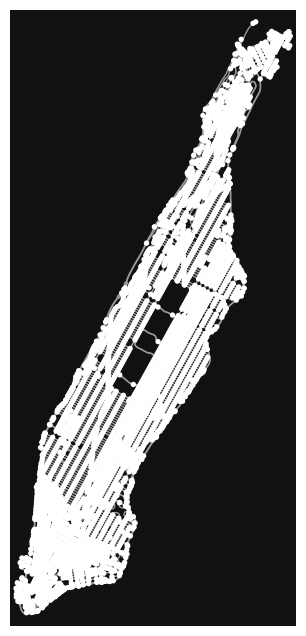

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
import osmnx as ox
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive')
ox.plot_graph(G)


In [16]:
# Print a random node and its adjacent edges
node = list(G.nodes(data=True))[0]
edge = list(G.edges(data=True))[0]

print(node)
print(edge)

(42421728, {'y': 40.7980478, 'x': -73.9600437, 'highway': 'traffic_signals', 'street_count': 3})
(42421728, 42432736, {'osmid': 195743153, 'name': 'Central Park West', 'highway': 'secondary', 'maxspeed': '25 mph', 'oneway': False, 'reversed': False, 'length': 86.25800000000001, 'geometry': <LINESTRING (-73.96 40.798, -73.96 40.798, -73.96 40.799, -73.96 40.799)>})


In [3]:
# Load NYC data
import pandas as pd
import networkx as nx

df = pd.read_csv('~/Downloads/nyc-taxi-trip-duration/train.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])

# Print the first 5 rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


/home/alex/anaconda3/envs/dasc5300/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/alex/anaconda3/envs/dasc5300/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alex/anaconda3/envs/dasc5300/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alex/anaconda3/envs/dasc5300/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

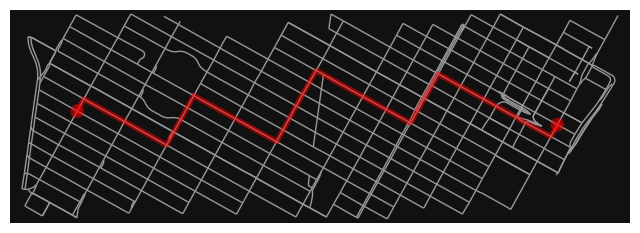

In [15]:
# Select the third row
ride = df.iloc[100]


# Get the minimum and maximum longitude and latitude
min_longitude, max_longitude = min(ride['pickup_longitude'], ride['dropoff_longitude']), max(ride['pickup_longitude'], ride['dropoff_longitude'])
min_latitude, max_latitude = min(ride['pickup_latitude'], ride['dropoff_latitude']), max(ride['pickup_latitude'], ride['dropoff_latitude'])

# Create a local graph from the bounding box of the ride
padding = 0.005
G_local = ox.graph_from_bbox(max_latitude + padding, min_latitude - padding, max_longitude + padding, min_longitude - padding, network_type='drive')

# Find the nearest node to the dropoff and pickup location
orig_node = ox.distance.nearest_nodes(G_local, ride['pickup_longitude'], ride['pickup_latitude'])
dest_node = ox.distance.nearest_nodes(G_local, ride['dropoff_longitude'], ride['dropoff_latitude'])

# Find the shortest path between the two nodes
route = nx.shortest_path(G_local, orig_node, dest_node, weight='length')

# Plot the route
fig, ax = ox.plot_graph_route(G_local, route, node_size=0)